# Task 1 : Data Vectorization

## Task 1.1 :Load the 'Movie Review' Corpus data through sKLearn

In [14]:
import sklearn
from sklearn.datasets import load_files
 
moviedir = './movie_reviews/movie_reviews'                   #path for data file
movie_data = load_files(moviedir, shuffle=True)              #Loading data file

## Task 1.2 : Split the data into training and test sets 

In [15]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data into training and test sets
reviews_train, reviews_test, y_train, y_test = train_test_split(
    movie_data.data, movie_data.target, test_size = 0.20, random_state = 12)

## Task 1.3 : Vectorize the training data using the tfidf Vectorizer 

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer(
        sublinear_tf=True, # Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
        max_df=0.5, # ignore terms that appaer in more than that fraction of docs 
        min_df=1, #  ignore terms that have lower document frequency 
        stop_words=stopwords.words('english'),
        use_idf=True, # Enable inverse-document-frequency reweighting.
        smooth_idf=True) # Smooth idf weights by adding one to document frequencies
X_train = vectorizer.fit_transform(reviews_train)
print("X_train n_samples: %d, n_features: %d" % X_train.shape)


[nltk_data] Downloading package stopwords to C:\Users\ABIKJITH
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


X_train n_samples: 1600, n_features: 35716


## Task 1.4 Vectorize test data using the same method above 

In [17]:
X_test = vectorizer.transform(reviews_test)                      #test data for vectorization
print("X_test n_samples: %d, n_features: %d" % X_test.shape)

X_test n_samples: 400, n_features: 35716


In [29]:
X_test.data

array([0.03900147, 0.05148288, 0.05319276, ..., 0.04845109, 0.02744433,
       0.04137382])

In [18]:
stop_words = stopwords.words('english')
stop_words[:9]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

# Task 2 : Apply Logistic Regression with L2-Regularization. (Use regularization parameter C = 1.0)   

In [19]:
# Train a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=1).fit(X_train, y_train)                    #Logistic regression with regularization parameter C=1

# Task 3: Performance evaluation 

## Task 3.1 : Examine the performance of the classifier used in  task 2 (i.e.F1 Scores, train and test time)   

In [20]:
# Predicting the Test set results, find accuracy
y_pred = clf.predict(X_test)
print('y_pred[:15] =',y_pred[:15])
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
# precision = ability of classifier not to label as positive a sample that is negative
prec = round(sklearn.metrics.precision_score(y_test, y_pred),2)
# recall = ability of classifier to find all the positive samples
rec = round(sklearn.metrics.recall_score(y_test, y_pred),2)
f1 = round(sklearn.metrics.f1_score(y_test, y_pred),2)
print('accuracy =',acc, '\nprecision =', prec, '\nrecall =', rec, '\nf1 =',f1)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix (rows are true counts)\n',movie_data.target_names,'\n',cm)

y_pred[:15] = [0 0 1 0 1 0 1 0 0 1 1 0 1 0 1]
accuracy = 0.86 
precision = 0.84 
recall = 0.88 
f1 = 0.86
confusion matrix (rows are true counts)
 ['neg', 'pos'] 
 [[173  33]
 [ 23 171]]


In [21]:
import time             #importing time library

In [22]:
st = time.time()                                           # st is start time 

clf = LogisticRegression(C=1).fit(X_train, y_train)

et = time.time()                                          #et is end time calculated using time.time()
ttrain = et-st
print("Total time taken for train {} ".format(ttrain))

Total time taken for train 0.11504983901977539 


In [23]:
st = time.time()

y_pred = clf.predict(X_test)

et = time.time()
ttest = et-st
print("Total time taken for test {}".format(ttest))

Total time taken for test 0.0009996891021728516


In [24]:
import matplotlib.pyplot as plt

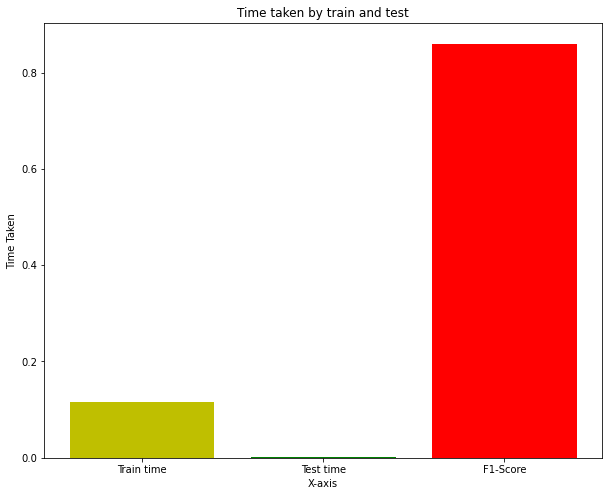

In [25]:
data = {'Train time':ttrain, 'Test time':ttest,'F1-Score':f1}                  #Dictinary of labels and values
time = list(data.keys())                                         #list of labels
values= list(data.values())                                      #list of values

fig = plt.figure(figsize=(10,8))                                 # setting figure size



plt.bar(time,values,color=['y','g','r'])                            #plotting bar graph using matplotlib library


plt.xlabel("X-axis")                                           #setting x-axis title
plt.ylabel("Time Taken")                                       #setting y-axis title
plt.title("Time taken by train and test")                      # Title of the graph
plt.show()

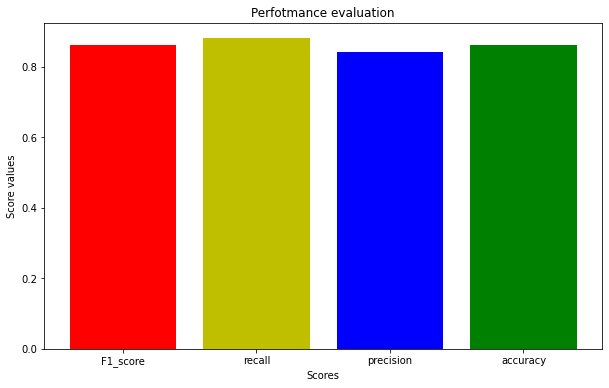

In [26]:
data1 = {"F1_score":f1,"recall":rec,"precision":prec,"accuracy":acc}
scores = list(data1.keys())
values = list(data1.values())

plt.figure(figsize=(10,6))



plt.bar(scores,values,color=["r","y","b","g"])
plt.xlabel("Scores")
plt.ylabel("Score values")
plt.title("Perfotmance evaluation")
plt.show()